- 7/1 Try correlating flows with the samples, comparing samples and with the sum of the average flows of the day the sample was taken and the previous 3 days. Not correlated (Pearson R Coefficient 0.116)
- 7/4 Compare correlations for sum of flows and bacteria counts: 
    - Day of and previous 3 days: Pearson R Coefficient 0.116
    - Day of and previous 2 days: Pearson R Coefficient 0.153
    - Day of and previous 1 days: Pearson R Coefficient 0.275
    - Day of and previous 0 days: Pearson R Coefficient 0.271



In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import datetime as dt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [8]:
qual = pd.read_csv("mill_river_data.csv", parse_dates=['Sample Date'])
flow = pd.read_csv("mill_river_flow.csv", parse_dates=['datetime'])
mrn9 = pd.read_csv("mrn9_data.csv", parse_dates = ['Sample Date'])

In [9]:
flow['Sample Date'] = flow['datetime'] 
flow

,datetime,"Discharge, cubic feet per second (mean)","data-value (approved, provisional, estimated)",Sample Date
0,2012-05-17,134.0,A,2012-05-17
1,2012-05-18,85.9,A,2012-05-18
2,2012-05-19,69.1,A,2012-05-19
3,2012-05-20,59.5,A,2012-05-20
4,2012-05-21,55.4,A,2012-05-21
...,...,...,...,...
3323,2021-06-22,24.7,P,2021-06-22
3324,2021-06-23,30.6,P,2021-06-23
3325,2021-06-24,24.0,P,2021-06-24
3326,2021-06-25,21.2,P,2021-06-25


In [10]:
flow

,datetime,"Discharge, cubic feet per second (mean)","data-value (approved, provisional, estimated)",Sample Date
0,2012-05-17,134.0,A,2012-05-17
1,2012-05-18,85.9,A,2012-05-18
2,2012-05-19,69.1,A,2012-05-19
3,2012-05-20,59.5,A,2012-05-20
4,2012-05-21,55.4,A,2012-05-21
...,...,...,...,...
3323,2021-06-22,24.7,P,2021-06-22
3324,2021-06-23,30.6,P,2021-06-23
3325,2021-06-24,24.0,P,2021-06-24
3326,2021-06-25,21.2,P,2021-06-25


In [11]:
qual

,Sample Date,Status,CFU/100ml,Wet
0,2021-06-24,Yellow Clean for Boating,461.1,N
1,2021-06-17,Yellow Clean for Boating,275.5,N
2,2021-06-10,Red Not Clean for Boating or Swimming,727,Y
3,2021-06-03,Blue Clean for Boating and Swimming,158,N
4,2020-10-29,Yellow Clean for Boating,259.5,N
...,...,...,...,...
169,2012-06-28,Blue Clean for Boating and Swimming,131.4,N
170,2012-06-21,Blue Clean for Boating and Swimming,159.7,N
171,2012-06-14,Blue Clean for Boating and Swimming,193.5,Y
172,2012-06-07,Blue Clean for Boating and Swimming,172,Y


In [12]:
data = mrn9.copy()
data

,Site ID,Sample Date,Wet Weather?,MPN/100mL Undiluted Sample,Flow %,CFS,Level
0,MRN9,2012-06-21,N,159.7,31%,40.20,Moderate
1,MRN9,2012-06-28,N,131.4,22%,27.90,Low
2,MRN9,2012-07-05,N,156.5,14%,19.10,Low
3,MRN9,2012-07-12,N,461.1,7%,11.70,Low
4,MRN9,2012-07-19,N,365.4,4%,8.99,Low
...,...,...,...,...,...,...,...
168,MRN9,2020-08-06,Y,344.8,15%,20.00,Low
169,MRN9,2020-08-20,Y,344.8,3%,8.05,Low
170,MRN9,2020-09-03,Y,4839.2,19%,24.90,Low
171,MRN9,2020-10-01,Y,4839.2,29%,37.10,Moderate


goal: 
- create `qual['3flows']` a col which contains average of past three days' discharge rates  
   
how to get that: 
- run .apply() over the column `qual['Sample Date']` to match discharge data from (date), (date-1day), (date-2day), and (date-3days)
- for each sample date in `qual`, obtain `flow['Discharge, cubic feet per second (mean) 	'] for match, match-1day, match-2days, match-3days, 
- put the average of those four values into the table 


In [13]:
qual

,Sample Date,Status,CFU/100ml,Wet
0,2021-06-24,Yellow Clean for Boating,461.1,N
1,2021-06-17,Yellow Clean for Boating,275.5,N
2,2021-06-10,Red Not Clean for Boating or Swimming,727,Y
3,2021-06-03,Blue Clean for Boating and Swimming,158,N
4,2020-10-29,Yellow Clean for Boating,259.5,N
...,...,...,...,...
169,2012-06-28,Blue Clean for Boating and Swimming,131.4,N
170,2012-06-21,Blue Clean for Boating and Swimming,159.7,N
171,2012-06-14,Blue Clean for Boating and Swimming,193.5,Y
172,2012-06-07,Blue Clean for Boating and Swimming,172,Y


In [14]:
qual['Sample Date']

0     2021-06-24
1     2021-06-17
2     2021-06-10
3     2021-06-03
4     2020-10-29
         ...    
169   2012-06-28
170   2012-06-21
171   2012-06-14
172   2012-06-07
173   2012-05-31
Name: Sample Date, Length: 174, dtype: datetime64[ns]

In [15]:
x = flow.iloc[3311,0].date()
y = qual.iloc[3,0].date()
x-y




datetime.timedelta(days=7)

In [16]:
flow['Discharge'] = flow['Discharge, cubic feet per second (mean)']
flow.index

RangeIndex(start=0, stop=3328, step=1)

In [17]:
def threeflow(x):
    for i in flow.index: 
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=0):
            a = flow.loc[i, 'Discharge']
    for i in flow.index:     
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=1):
            b = flow.loc[i, 'Discharge'] 
    for i in flow.index:     
        if x.date() -  flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=2):
            c = flow.loc[i, 'Discharge'] 
    for i in flow.index:     
        if x.date() -  flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=3):
            d = flow.loc[i, 'Discharge']
    return a+b+c+d


In [18]:
threeflow(qual['Sample Date'][0])


102.1

In [227]:
qual['3flows'] = qual['Sample Date'].apply(lambda x: threeflow(x))
qual

,Sample Date,Status,CFU/100ml,Wet,3flows
0,2021-06-24,Yellow Clean for Boating,461.1,N,102.1
1,2021-06-17,Yellow Clean for Boating,275.5,N,205.5
2,2021-06-10,Red Not Clean for Boating or Swimming,727,Y,188.2
3,2021-06-03,Blue Clean for Boating and Swimming,158,N,469.6
4,2020-10-29,Yellow Clean for Boating,259.5,N,147.3
...,...,...,...,...,...
169,2012-06-28,Blue Clean for Boating and Swimming,131.4,N,138.1
170,2012-06-21,Blue Clean for Boating and Swimming,159.7,N,186.6
171,2012-06-14,Blue Clean for Boating and Swimming,193.5,Y,415.9
172,2012-06-07,Blue Clean for Boating and Swimming,172,Y,726.0


In [204]:
data['3flows'] = data['Sample Date'].apply(lambda x: threeflow(x))
data

,Site ID,Sample Date,Wet Weather?,MPN/100mL Undiluted Sample,Flow %,CFS,Level,3flows
0,MRN9,2012-06-21,N,159.7,31%,40.20,Moderate,186.60
1,MRN9,2012-06-28,N,131.4,22%,27.90,Low,138.10
2,MRN9,2012-07-05,N,156.5,14%,19.10,Low,75.60
3,MRN9,2012-07-12,N,461.1,7%,11.70,Low,51.20
4,MRN9,2012-07-19,N,365.4,4%,8.99,Low,42.19
...,...,...,...,...,...,...,...,...
168,MRN9,2020-08-06,Y,344.8,15%,20.00,Low,88.20
169,MRN9,2020-08-20,Y,344.8,3%,8.05,Low,34.11
170,MRN9,2020-09-03,Y,4839.2,19%,24.90,Low,55.95
171,MRN9,2020-10-01,Y,4839.2,29%,37.10,Moderate,146.98


In [207]:
sum(flow.loc[3308:3311, 'Discharge'])

188.2

In [222]:
flow.loc[55, 'datetime']

Timestamp('2012-07-11 00:00:00')

In [224]:
sum(flow.loc[53:56, 'Discharge' ])

51.2

In [209]:
flow3days = data['3flows']
bac = data['MPN/100mL Undiluted Sample']

pearsonr_coefficient, p_value = pearsonr(bac, flow3days)
print('Pearson R Correlation Coefficient %0.3f'% (pearsonr_coefficient))

Pearson R Correlation Coefficient 0.116


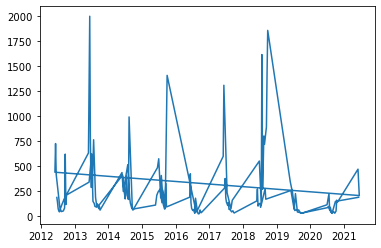

In [234]:
plt.pyplot.plot('Sample Date', '3flows', data=data)

In [179]:
type(data['MPN/100mL Undiluted Sample'][10])

numpy.float64

In [181]:
help(pd.to_numeric)

Help on function to_numeric in module pandas.core.tools.numeric:

to_numeric(arg, errors='raise', downcast=None)
    Convert argument to a numeric type.
    
    The default return dtype is `float64` or `int64`
    depending on the data supplied. Use the `downcast` parameter
    to obtain other dtypes.
    
    Please note that precision loss may occur if really large numbers
    are passed in. Due to the internal limitations of `ndarray`, if
    numbers smaller than `-9223372036854775808` (np.iinfo(np.int64).min)
    or larger than `18446744073709551615` (np.iinfo(np.uint64).max) are
    passed in, it is very likely they will be converted to float so that
    they can stored in an `ndarray`. These warnings apply similarly to
    `Series` since it internally leverages `ndarray`.
    
    Parameters
    ----------
    arg : scalar, list, tuple, 1-d array, or Series
        Argument to be converted.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then in

In [189]:
qual['CFU/100ml'][54]

'> 2419.6'

In [11]:
data['Total Flow Previous 3 days'] = data.shape[0]*

(173, 7)

In [46]:
df2 = mrn9['Sample Date']
type(df2)

pandas.core.series.Series

In [14]:
flow = mrn9['CFS']
bac = mrn9['MPN/100mL Undiluted Sample']

pearsonr_coefficient, p_value = pearsonr(bac, flow)
print('PreasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PreasonR Correlation Coefficient 0.271


In [19]:
def threeflow_avg(x):
    for i in flow.index: 
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=0):
            a = flow.loc[i, 'Discharge']
    for i in flow.index:     
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=1):
            b = flow.loc[i, 'Discharge'] 
    for i in flow.index:     
        if x.date() -  flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=2):
            c = flow.loc[i, 'Discharge'] 
    for i in flow.index:     
        if x.date() -  flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=3):
            d = flow.loc[i, 'Discharge']
    return (a+b+c+d)/4

In [20]:
data['3flows_avg'] = data['Sample Date'].apply(lambda x: threeflow_avg(x))
data

,Site ID,Sample Date,Wet Weather?,MPN/100mL Undiluted Sample,Flow %,CFS,Level,3flows_avg
0,MRN9,2012-06-21,N,159.7,31%,40.20,Moderate,46.6500
1,MRN9,2012-06-28,N,131.4,22%,27.90,Low,34.5250
2,MRN9,2012-07-05,N,156.5,14%,19.10,Low,18.9000
3,MRN9,2012-07-12,N,461.1,7%,11.70,Low,12.8000
4,MRN9,2012-07-19,N,365.4,4%,8.99,Low,10.5475
...,...,...,...,...,...,...,...,...
168,MRN9,2020-08-06,Y,344.8,15%,20.00,Low,22.0500
169,MRN9,2020-08-20,Y,344.8,3%,8.05,Low,8.5275
170,MRN9,2020-09-03,Y,4839.2,19%,24.90,Low,13.9875
171,MRN9,2020-10-01,Y,4839.2,29%,37.10,Moderate,36.7450


In [21]:
flow3days = data['3flows_avg']
bac = data['MPN/100mL Undiluted Sample']

pearsonr_coefficient, p_value = pearsonr(bac, flow3days)
print('Pearson R Correlation Coefficient %0.3f'% (pearsonr_coefficient))

Pearson R Correlation Coefficient 0.116


In [28]:
def twoflow(x):
    for i in flow.index: 
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=0):
            a = flow.loc[i, 'Discharge']
    for i in flow.index:     
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=1):
            b = flow.loc[i, 'Discharge'] 
    for i in flow.index:     
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=2):
            c = flow.loc[i, 'Discharge'] 
    return a+b+c

In [29]:
data['2flows'] = data['Sample Date'].apply(lambda x: twoflow(x))
data

,Site ID,Sample Date,Wet Weather?,MPN/100mL Undiluted Sample,Flow %,CFS,Level,3flows_avg,2flows_avg,2flows
0,MRN9,2012-06-21,N,159.7,31%,40.20,Moderate,46.6500,44.933333,134.80
1,MRN9,2012-06-28,N,131.4,22%,27.90,Low,34.5250,34.000000,102.00
2,MRN9,2012-07-05,N,156.5,14%,19.10,Low,18.9000,18.900000,56.70
3,MRN9,2012-07-12,N,461.1,7%,11.70,Low,12.8000,12.333333,37.00
4,MRN9,2012-07-19,N,365.4,4%,8.99,Low,10.5475,10.030000,30.09
...,...,...,...,...,...,...,...,...,...,...
168,MRN9,2020-08-06,Y,344.8,15%,20.00,Low,22.0500,24.333333,73.00
169,MRN9,2020-08-20,Y,344.8,3%,8.05,Low,8.5275,8.400000,25.20
170,MRN9,2020-09-03,Y,4839.2,19%,24.90,Low,13.9875,14.783333,44.35
171,MRN9,2020-10-01,Y,4839.2,29%,37.10,Moderate,36.7450,46.283333,138.85


In [30]:
flow2days = data['2flows']
bac = data['MPN/100mL Undiluted Sample']

pearsonr_coefficient, p_value = pearsonr(bac, flow2days)
print('Pearson R Correlation Coefficient %0.3f'% (pearsonr_coefficient))

Pearson R Correlation Coefficient 0.153


In [33]:
flow

,datetime,"Discharge, cubic feet per second (mean)","data-value (approved, provisional, estimated)",Sample Date,Discharge
0,2012-05-17,134.0,A,2012-05-17,134.0
1,2012-05-18,85.9,A,2012-05-18,85.9
2,2012-05-19,69.1,A,2012-05-19,69.1
3,2012-05-20,59.5,A,2012-05-20,59.5
4,2012-05-21,55.4,A,2012-05-21,55.4
...,...,...,...,...,...
3323,2021-06-22,24.7,P,2021-06-22,24.7
3324,2021-06-23,30.6,P,2021-06-23,30.6
3325,2021-06-24,24.0,P,2021-06-24,24.0
3326,2021-06-25,21.2,P,2021-06-25,21.2


In [36]:
def dayflow(x):
    for i in flow.index: 
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=0):
            return flow.loc[i, 'Discharge']

In [37]:
data['dayflow'] = data['Sample Date'].apply(lambda x: dayflow(x))
data

,Site ID,Sample Date,Wet Weather?,MPN/100mL Undiluted Sample,Flow %,CFS,Level,3flows_avg,2flows_avg,2flows,dayflow
0,MRN9,2012-06-21,N,159.7,31%,40.20,Moderate,46.6500,44.933333,134.80,40.20
1,MRN9,2012-06-28,N,131.4,22%,27.90,Low,34.5250,34.000000,102.00,27.90
2,MRN9,2012-07-05,N,156.5,14%,19.10,Low,18.9000,18.900000,56.70,19.10
3,MRN9,2012-07-12,N,461.1,7%,11.70,Low,12.8000,12.333333,37.00,11.70
4,MRN9,2012-07-19,N,365.4,4%,8.99,Low,10.5475,10.030000,30.09,8.99
...,...,...,...,...,...,...,...,...,...,...,...
168,MRN9,2020-08-06,Y,344.8,15%,20.00,Low,22.0500,24.333333,73.00,20.00
169,MRN9,2020-08-20,Y,344.8,3%,8.05,Low,8.5275,8.400000,25.20,8.05
170,MRN9,2020-09-03,Y,4839.2,19%,24.90,Low,13.9875,14.783333,44.35,24.90
171,MRN9,2020-10-01,Y,4839.2,29%,37.10,Moderate,36.7450,46.283333,138.85,37.10


In [48]:
flow0days = data['dayflow']
bac = data['MPN/100mL Undiluted Sample']

pearsonr_coefficient, p_value = pearsonr(bac, flow0days)
print('Pearson R Correlation Coefficient %0.3f'% (pearsonr_coefficient))

Pearson R Correlation Coefficient 0.271


In [50]:
def flow1days(x):
    for i in flow.index: 
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=0):
            a = flow.loc[i, 'Discharge']
    for i in flow.index: 
        if x.date() - flow.loc[i, 'Sample Date'].date() == dt.timedelta(days=1): 
            b = flow.loc[i, 'Discharge']
    return a+b 

In [51]:
data['1flows'] = data['Sample Date'].apply(lambda x: flow1days(x))
data

,Site ID,Sample Date,Wet Weather?,MPN/100mL Undiluted Sample,Flow %,CFS,Level,3flows_avg,2flows_avg,2flows,dayflow,1flows
0,MRN9,2012-06-21,N,159.7,31%,40.20,Moderate,46.6500,44.933333,134.80,40.20,86.70
1,MRN9,2012-06-28,N,131.4,22%,27.90,Low,34.5250,34.000000,102.00,27.90,60.80
2,MRN9,2012-07-05,N,156.5,14%,19.10,Low,18.9000,18.900000,56.70,19.10,38.90
3,MRN9,2012-07-12,N,461.1,7%,11.70,Low,12.8000,12.333333,37.00,11.70,24.10
4,MRN9,2012-07-19,N,365.4,4%,8.99,Low,10.5475,10.030000,30.09,8.99,18.99
...,...,...,...,...,...,...,...,...,...,...,...,...
168,MRN9,2020-08-06,Y,344.8,15%,20.00,Low,22.0500,24.333333,73.00,20.00,56.70
169,MRN9,2020-08-20,Y,344.8,3%,8.05,Low,8.5275,8.400000,25.20,8.05,16.20
170,MRN9,2020-09-03,Y,4839.2,19%,24.90,Low,13.9875,14.783333,44.35,24.90,35.00
171,MRN9,2020-10-01,Y,4839.2,29%,37.10,Moderate,36.7450,46.283333,138.85,37.10,129.20


In [52]:
flow1days = data['1flows']
bac = data['MPN/100mL Undiluted Sample']

pearsonr_coefficient, p_value = pearsonr(bac, flow1days)
print('Pearson R Correlation Coefficient %0.3f'% (pearsonr_coefficient))

Pearson R Correlation Coefficient 0.275


<AxesSubplot:xlabel='MPN/100mL Undiluted Sample', ylabel='1flows'>

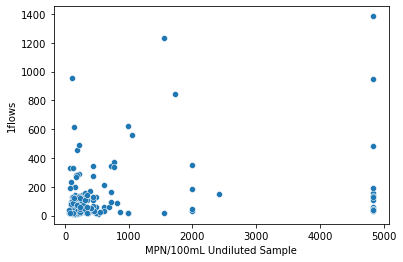

In [54]:
sb.scatterplot(data=data, x= data['MPN/100mL Undiluted Sample'], y=data['1flows'])

In [55]:
qual

,Sample Date,Status,CFU/100ml,Wet
0,2021-06-24,Yellow Clean for Boating,461.1,N
1,2021-06-17,Yellow Clean for Boating,275.5,N
2,2021-06-10,Red Not Clean for Boating or Swimming,727,Y
3,2021-06-03,Blue Clean for Boating and Swimming,158,N
4,2020-10-29,Yellow Clean for Boating,259.5,N
...,...,...,...,...
169,2012-06-28,Blue Clean for Boating and Swimming,131.4,N
170,2012-06-21,Blue Clean for Boating and Swimming,159.7,N
171,2012-06-14,Blue Clean for Boating and Swimming,193.5,Y
172,2012-06-07,Blue Clean for Boating and Swimming,172,Y


In [64]:
data.drop(labels=['2flows_avg'])
data

KeyError: "['2flows_avg'] not found in axis"

In [62]:
help(data['2flows_avg'].drop)

Help on method drop in module pandas.core.series:

drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise') -> 'Series' method of pandas.core.series.Series instance
    Return Series with specified index labels removed.
    
    Remove elements of a Series based on specifying the index labels.
    When using a multi-index, labels on different levels can be removed
    by specifying the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index labels to drop.
    axis : 0, default 0
        Redundant for application on Series.
    index : single label or list-like
        Redundant for application on Series, but 'index' can be used instead
        of 'labels'.
    columns : single label or list-like
        No change is made to the Series; use 'index' or 'labels' instead.
    level : int or level name, optional
        For MultiIndex, level for which the labels will be removed.
    inplace : bool, default False
 

In [65]:
qual.loc[169, 'Status']

'Blue Clean for Boating and Swimming'

In [67]:
def addqual(x):
    for i in qual.index: 
        if x.date() - qual.loc[i, 'Sample Date'].date() == dt.timedelta(days=0):
            if qual.loc[i, 'Status'] == 'Blue Clean for Boating and Swimming':
                return 1
            elif qual.loc[i, 'Status'] == 'Yellow Clean for Boating':
                return 2
            elif qual.loc[i, 'Status'] == 'Red Not Clean for Boating or Swimming':
                return 3
                

In [68]:
data['qual'] = data['Sample Date'].apply(lambda x: addqual(x))
data

,Site ID,Sample Date,Wet Weather?,MPN/100mL Undiluted Sample,Flow %,CFS,Level,3flows_avg,2flows_avg,2flows,dayflow,1flows,qual
0,MRN9,2012-06-21,N,159.7,31%,40.20,Moderate,46.6500,44.933333,134.80,40.20,86.70,1
1,MRN9,2012-06-28,N,131.4,22%,27.90,Low,34.5250,34.000000,102.00,27.90,60.80,1
2,MRN9,2012-07-05,N,156.5,14%,19.10,Low,18.9000,18.900000,56.70,19.10,38.90,1
3,MRN9,2012-07-12,N,461.1,7%,11.70,Low,12.8000,12.333333,37.00,11.70,24.10,2
4,MRN9,2012-07-19,N,365.4,4%,8.99,Low,10.5475,10.030000,30.09,8.99,18.99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,MRN9,2020-08-06,Y,344.8,15%,20.00,Low,22.0500,24.333333,73.00,20.00,56.70,2
169,MRN9,2020-08-20,Y,344.8,3%,8.05,Low,8.5275,8.400000,25.20,8.05,16.20,2
170,MRN9,2020-09-03,Y,4839.2,19%,24.90,Low,13.9875,14.783333,44.35,24.90,35.00,3
171,MRN9,2020-10-01,Y,4839.2,29%,37.10,Moderate,36.7450,46.283333,138.85,37.10,129.20,3


In [80]:
bac = data['qual']
flow = data['1flows']

pearsonr_coefficient, p_value = pearsonr(bac, flow)
print('Pearson R Correlation Coefficient %0.3f'% (pearsonr_coefficient))

Pearson R Correlation Coefficient 0.254


<AxesSubplot:xlabel='qual', ylabel='2flows'>

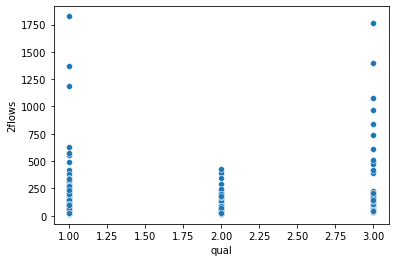

In [78]:
sb.scatterplot(data=data, x= data['qual'], y=data['2flows'])